In [1]:
import pandas as pd

In [2]:
sars_death=pd.read_csv("sars_2003_complete_dataset_clean.csv")
sars_death.head()

,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
0,2003-03-17,Germany,1,0,0
1,2003-03-17,Canada,8,2,0
2,2003-03-17,Singapore,20,0,0
3,2003-03-17,"Hong Kong SAR, China",95,1,0
4,2003-03-17,Switzerland,2,0,0


In [3]:
sars = sars_death[["Date", "Cumulative number of case(s)", "Number of deaths", "Number recovered"]]
sars.head()

,Date,Cumulative number of case(s),Number of deaths,Number recovered
0,2003-03-17,1,0,0
1,2003-03-17,8,2,0
2,2003-03-17,20,0,0
3,2003-03-17,95,1,0
4,2003-03-17,2,0,0


In [4]:
grouped_by_day = sars.groupby("Date").sum()
grouped_by_day.head()

,Cumulative number of case(s),Number of deaths,Number recovered
Date,,,
2003-03-17,167,4,0
2003-03-18,219,4,0
2003-03-19,264,9,0
2003-03-20,306,10,0
2003-03-21,350,10,0


In [5]:
grouped_by_day['daily_difference'] = grouped_by_day['Cumulative number of case(s)'].diff()
grouped_by_day['daily_difference'].head()

Date
2003-03-17     NaN
2003-03-18    52.0
2003-03-19    45.0
2003-03-20    42.0
2003-03-21    44.0
Name: daily_difference, dtype: float64

In [8]:
non_neg = grouped_by_day.loc[grouped_by_day['daily_difference'] >= 0]


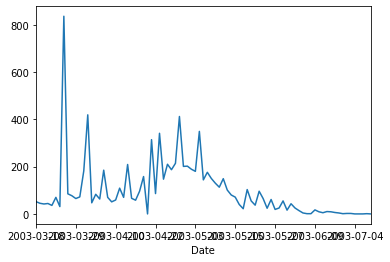

In [11]:
non_neg['daily_difference'].plot(kind="line")

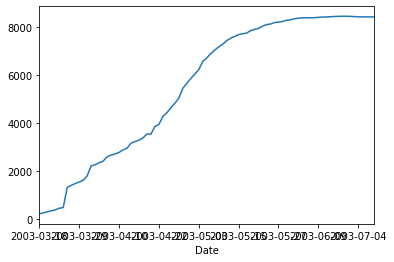

In [12]:
non_neg['Cumulative number of case(s)'].plot(kind="line")

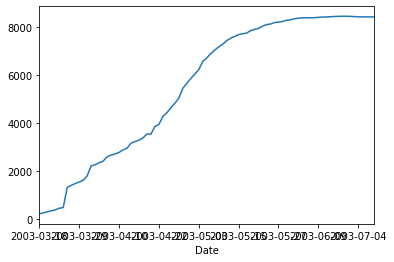

In [15]:
stock2003=pd.read_csv("2002 -nov-2003-oct.csv")
stock2003.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-11-01,885.760010,903.419983,877.710022,900.960022,900.960022,1450400000
1,2002-11-04,900.960022,924.580017,900.960022,908.349976,908.349976,1645900000
2,2002-11-05,908.349976,915.830017,904.909973,915.390015,915.390015,1354100000
3,2002-11-06,915.390015,925.659973,905.000000,923.760010,923.760010,1674000000
4,2002-11-07,923.760010,923.760010,898.679993,902.650024,902.650024,1466900000


In [18]:
final2003=pd.merge(grouped_by_day,stock2003, on="Date",how="left" )
final2003

,Date,Cumulative number of case(s),Number of deaths,Number recovered,daily_difference,Open,High,Low,Close,Adj Close,Volume
0,2003-03-17,167,4,0,NaN,833.270020,862.789978,827.169983,862.789978,862.789978,1.700420e+09
1,2003-03-18,219,4,0,52.0,862.789978,866.940002,857.359985,866.450012,866.450012,1.555100e+09
2,2003-03-19,264,9,0,45.0,866.450012,874.989990,861.210022,874.020020,874.020020,1.473400e+09
3,2003-03-20,306,10,0,42.0,874.020020,879.599976,859.010010,875.669983,875.669983,1.439100e+09
4,2003-03-21,350,10,0,44.0,875.840027,895.900024,875.840027,895.789978,895.789978,1.883710e+09
...,...,...,...,...,...,...,...,...,...,...,...
91,2003-07-07,8434,812,7426,0.0,985.700012,1005.559998,985.700012,1004.419983,1004.419983,1.429100e+09
92,2003-07-08,8431,812,7428,-3.0,1004.419983,1008.919983,998.729980,1007.840027,1007.840027,1.565700e+09
93,2003-07-09,8431,812,7438,0.0,1007.840027,1010.429993,998.169983,1002.210022,1002.210022,1.618000e+09
94,2003-07-10,8432,812,7444,1.0,1002.210022,1002.210022,983.630005,988.700012,988.700012,1.465700e+09


In [20]:
final2003.to_csv("stock_sars_final2003.csv",index=False,header=True)

In [25]:
final2003["daily_difference"].fillna("0", inplace = True) 
final2003

,Date,Cumulative number of case(s),Number of deaths,Number recovered,daily_difference,Open,High,Low,Close,Adj Close,Volume
0,2003-03-17,167,4,0,0,833.270020,862.789978,827.169983,862.789978,862.789978,1.700420e+09
1,2003-03-18,219,4,0,52,862.789978,866.940002,857.359985,866.450012,866.450012,1.555100e+09
2,2003-03-19,264,9,0,45,866.450012,874.989990,861.210022,874.020020,874.020020,1.473400e+09
3,2003-03-20,306,10,0,42,874.020020,879.599976,859.010010,875.669983,875.669983,1.439100e+09
4,2003-03-21,350,10,0,44,875.840027,895.900024,875.840027,895.789978,895.789978,1.883710e+09
...,...,...,...,...,...,...,...,...,...,...,...
91,2003-07-07,8434,812,7426,0,985.700012,1005.559998,985.700012,1004.419983,1004.419983,1.429100e+09
92,2003-07-08,8431,812,7428,-3,1004.419983,1008.919983,998.729980,1007.840027,1007.840027,1.565700e+09
93,2003-07-09,8431,812,7438,0,1007.840027,1010.429993,998.169983,1002.210022,1002.210022,1.618000e+09
94,2003-07-10,8432,812,7444,1,1002.210022,1002.210022,983.630005,988.700012,988.700012,1.465700e+09


In [26]:
final2003.dropna(inplace = True)

In [30]:
final2003["Daily Adj close change"]=final2003["Adj Close"].diff()
final2003["Daily Volume change"]=final2003["Volume"].diff()
final2003.round(2).head()

,Date,Cumulative number of case(s),Number of deaths,Number recovered,daily_difference,Open,High,Low,Close,Adj Close,Volume,Daily Adj close change,Daily Volume change
0,2003-03-17,167,4,0,0,833.27,862.79,827.17,862.79,862.79,1.700420e+09,NaN,NaN
1,2003-03-18,219,4,0,52,862.79,866.94,857.36,866.45,866.45,1.555100e+09,3.66,-145320000.0
2,2003-03-19,264,9,0,45,866.45,874.99,861.21,874.02,874.02,1.473400e+09,7.57,-81700000.0
3,2003-03-20,306,10,0,42,874.02,879.60,859.01,875.67,875.67,1.439100e+09,1.65,-34300000.0
4,2003-03-21,350,10,0,44,875.84,895.90,875.84,895.79,895.79,1.883710e+09,20.12,444610000.0


In [31]:
final2003.fillna("0", inplace = True) 

In [33]:
final2003.to_csv("stock_sars_final2003.csv",index=False,header=True)